# READ ME FIRST
Before using this script, make sure to upload all of your own data to the "data" folder in the home directory where you first arrived at this notebook before continuing. If this step is skipped, you will not be able to select your specific files for analysis. Additionally, the files cannot be added after making changes to the script because this script will need to be restarted for the files to show up. 

# Information Entry Script for Metagenomic Analysis
The purpose of this notebook is to 1. simplify the process of exploring microbial data and 2. allow for easy reproducibility and collaboration with others. Rather than trying to manually explore the .csv file and code in R to create 3-4 figures, this notebook will allow you to not only generate significantly more figures, but also dynamically look through your data for easy initial exploration. The script currently consists of two parts: the first part is for the information and data entry necessary for the script to generate plots and figures, and the second is the generation and actual exploration of the pltos. 

The Jupyter Notebook works by using widgets. In order for the widget to properly appear, the cell corresponding to the widget must first be run - then only will the widget appear. 

When running this script, run all of the cells sequentially one after another. Be sure to complete the current cell before moving on to the next cell. This will ensure the script runs smoothly. 

For questions about this script, please contact Akhil Gupta (gupta305@umn.edu). 

---

## Import UI Elements Script
This will load in all necessary widgets. You must run this line prior to proceeding to the rest of the notebook.

In [4]:
# Importing necessary functions from another .ipynb script
%run ui_elem.ipynb

----------------

## File Paths

Here, you will need to select the files that you want to use for your analysis. For now, we have provided sample files 
that serve as both placeholders, as well as examples for what your own files should look like. These files should ideally be replaced by your own files in order to see your own custom results. 


_**Resistome Files**_

* **AMR Count Matrix File**: The AMR Count matrix file

* **AMR Metadata File**: AMR metadata file

* **MEGARes Annotation File**: 


_**Microbiome Files**_

* **.Biom File**: 

* **Tree File**: 

* **FASTA File**: 

* **Taxonomy File**: 

* **Microbiome Metadata File**:


Prior to running this portion of the script, be sure that all the files that will be used for analysis are uploaded to the data folder in the file directory where this script was opened from. Open the directory named "data", and upload all files that will be necessary to run the analysis. All the scripts that are required for the analysis are listed below. 

Once the files have been uploaded, click on the refresh button at the top of the page. 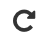

Jupyter doesn't update the list below while the kernel is running, so you will instead have to restart the kernel by pressing that button. Once restarted, the file should appear in the drop down menu below, where you can then select the corresponding file. The current placeholders will work just fine if you don't have a certain file on hand. 

### Loading in resistome files

In [5]:
resistome_filenames

### Loading in microbiome files

In [6]:
microbiome_filenames

### Save the file names
Once all of your files have been selected, run this cell and click on the button below to save these files to memory. For your own convenience, the required file and it's corresponding file path will be printed once the button is pressed for review. 

If additional files are added, you will need to refresh the kernel in order for the newly added data files to appear. 

In [7]:
save_filepath_button

Button(description='Save the filepaths for analysis', icon='save', layout=Layout(width='70%'), style=ButtonSty…

AMR Count Matrix Filepath: test_AMR_analytic_matrix.csv
AMR Metadata Filepath: test_AMR_metadata.csv
MEGARes Annotation Filepath: test_AMR_megares_annotations_v1.03.csv
Biom Filepath: test_16S_otu_table_json.biom
Fasta Filepath: test_16S_tree.nwk
Taxonomy Filepath: test_16S_taxonomy.tsv
Microbiome Temp Metadata Filepath: test_16S_metadata.csv

All filepaths saved


--------------------------------------------------

## Identify Sample IDs
In order for the script to properly identify the different samples and sample IDs, you must specify which column in the metadata file contains this information. Based on the files selected above, you can select an uploaded .csv file to view below for your own convenience. Then, in the text box below, enter in the name of the column that contains all of the sample IDs. The column name should be entered exactly as it appears in the .csv file. 

In [11]:
meta = pd.read_csv(amr_metadata_filepath)
meta.head()

,ID,sample,City,Treatment,Dilution,Packaging,Packaging_samples,Lean,Blinded_Store,Store,Raw_paired_reads,QC_filtered_reads,nonhost_filtered_reads,amrplusplus_counts,Samdedup_amrplusplus_counts,deduped_SNP_confirmed_counts
0,FC-112A_concatenated,FC_112,Fort Collins,RWA,None,Vacuum,Vacuum(N=16),90,Store6,WholeFoods,38190379,36762458,28728,0,0,100
1,FC-112A1in2_concatenated,FC_112,Fort Collins,RWA,Half,Vacuum,Vacuum(N=16),90,Store6,WholeFoods,8544874,8249150,5538,82,60,673
2,FC-113A_concatenated,FC_113,Fort Collins,RWA,None,Vacuum,Vacuum(N=16),90,Store2,RWAGrocers,34644683,33386392,167830,20435,5764,9628
3,FC-113A1in2_concatenated,FC_113,Fort Collins,RWA,Half,Vacuum,Vacuum(N=16),90,Store2,RWAGrocers,49990544,48466450,172974,3801,2151,3777
4,FC-122A_concatenated,FC_122,Fort Collins,RWA,None,Vacuum,Vacuum(N=16),85,Store4,Sprouts,42523674,41038940,98088,32208,14459,19089


In [8]:
display(sample_column_id)

Text(value='ID', description='Column Name:', layout=Layout(width='70%'), placeholder='What is the name of the …

---

# Exploratory Variables
Here, you will be able to customize the analysis that you want to perform. You will be allowed to name the analysis, specify which items should be included or removed, and reorder categorical variables. For example, out of all the various treatments I may have in my data, I might only want to look at the control and one specific treatment. This example will be further explored below. 

## Sliders
The slider allows you to choose how many separate analyses should be run, and how many of them should be AMR analyses and how many should be Microbiome. 

## Exploratory Variables - Details
Every time the slider value is changed, the cell to generate the text boxes should be rerun in order to update them. They will then contain the correct number of boxes based on the values entered in the slider. 

**Name**: What do you want to call this particular analysis variable? This field is arbitrary and can be whatever you may choose to name it. For the example stated above, I might choose to name this "Treatment". 

**Subset**: Subset will allow you to select or filter out particular variables. To select variables of interest, the format should be “*column-2 == column-variable-1*”. This is exactly how you might enter this into R. Multiple values can be subsetted, they just need to be separated by a comma. To remove certain variables from the analysis, the format should be “*column_2 != column_variable_2*”. The key point is having the *!* symbol instead of the first exclamation point. Continuing the example from above, I could type: "Treatment==Control, Treatment==Treatment_1". This would allow me to select the control treatment as well as treatment_1.

**Explanatory Variable**: Here, you need to provide the name of the column that contains the different categories you're interested in subsetting. For the example, I would call this "Treatment". 

* ***NOTE***: Exploratory variables cannot be numeric. 

**Order**: This should describe the order that will be used during the analysis and when printing out result plots. *Each item in the list should be separated by a comma.* 

In [9]:
display(exp_graph_var_amr)
display(exp_graph_var_microbiome)

IntSlider(value=5, continuous_update=False, description='AMR', max=10)

IntSlider(value=5, continuous_update=False, description='Microbiome', max=10)

In [10]:
var_info(exp_graph_var_amr.value, exp_graph_var_microbiome.value)

--------

## IMPORTANT STEP

Once you are satisfied with all of the entered exploratory variables, run this code to save them. This will ensure that the data is stored correctly and will be output into the .csv file. 

In [13]:
# Saves and prints the variables entered above into a list to be used when creating the .csv file
list_vals_a, list_vals_m = save_print_variables(exp_graph_var_amr.value, exp_graph_var_microbiome.value)

---

## Outputting information into .csv file
This below will now store everything that was entered above into a .csv file that can be read in by the analysis script. The .csv file will be stored in the current working directory where this script is also stored. 

This .csv file is important to keep for reproducibility. The information that was all entered above is stored in this .csv file, and allows for someone else to be able to run the same analysis as you will run here. In order for someone else to replicate this analysis, they will need this generated .csv file, as well as all the data that was entered into the "data" folder prior to beginning this script.

In [12]:
display(vars_save_button)
vars_save_button.on_click(vars_to_csv)

Button(description='Save variables for analysis script', icon='save', layout=Layout(width='50%'), style=Button…

Variables Exported. Check directory for .csv file


***
***
***

# Generating Exploratory Figures
If you have run through the first half of this script yourself, continue to the next steps below. 

If you are replicating the exploratory analysis from someone else, you should have recieved a .csv file named "metagenomic_analysis_vars.csv", as well as all the data that individual used. Before running the code below, make sure that all of the data is uploaded in the "data" folder, located in the home directory when this binder repository was opened. Additionally, ensure that the "metagenomic_analysis_vars.csv" file is located in the home directory, the same directory where this file is located. 

## Run staging script with R magic
This is the script where all of the figures and output are generated, allowing us to continue with the analysis. This line might take some time to run, and it's important to be active on this page. Otherwise, if the analysis takes longer than usual, the binder will time out, forcing you to rerun this code. Simply clicking this cell should be sufficient to keep the binder repository from timing out. 

Once complete, this is the output you should expect to see: 
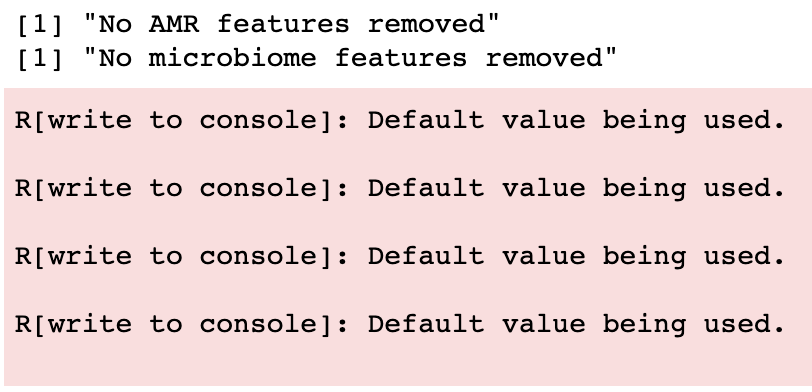

In [18]:
%%R -o amr_melted_analytic -o microbiome_melted_analytic -o amr_melted_raw_analytic -o microbiome_melted_raw_analytic
source("staging_script.R")

[1] "No AMR features removed"
[1] "No microbiome features removed"


R[write to console]: Default value being used.

R[write to console]: Default value being used.

R[write to console]: Default value being used.

R[write to console]: Default value being used.



# Open a Read Count File
The code above generated a normalized read count, as well as a raw read count table of your data. Below, you can select one of them to view for your convenience. Opening a file will then bring up options to view the data at different taxonomical levels (called Level_ID). Before proceeding through the script, it's important to note that based on your selection for Level_ID, a bar graph will be plotted for that specific Level_ID. 

In [20]:
display(file_open)
display(open_file_filter_button)

Dropdown(description='file:', options=('amr_melted_analytic', 'amr_melted_raw_analytic', 'microbiome_melted_an…

Button(description='Open File', icon='open', layout=Layout(width='50%'), style=ButtonStyle())

amr_melted_analytic


interactive(children=(Select(description='Level_ID', options=('All', 'Class', 'Gene', 'Group', 'Mechanism'), v…

# Interactive Plot
Here, an interactive plot will allow you to explore your data with greater detail. The figure will be plotted based on the Level_ID that was selected in the widget above. The Level_ID can be changed above, after which you can either press the button to create additional plots at different Level_IDs, or you can rerun the cell to remove the currently displayed plot and then press the button again to generate the plot at the Level_ID of interest. 

In [15]:
display(print_fig_button)

Button(description='Print Plot', icon='open', layout=Layout(width='50%'), style=ButtonStyle())

Working...


***

# View additional generated plots

The staging script that was run earlier also generated many other plots as well, based on the different exploratory variable that were created in the first half of the script. These plots are located in the "graphs" directory and can be viewed by going into the directories, but can also be viewed below. 

fdir lists the directory in which to look for figures, and is currently hard-coded to the graphs/Microbiome/Store directory. However, this can be changed by manually editing the directory to look at the plots you are interested in. The dropdown menu then lists all the plots that are present in that directory. 

In [22]:
_ = interact(show_images, fdir=('graphs/Microbiome/' + directory.value), file=images)

interactive(children=(Text(value='graphs/Microbiome/Store', description='fdir'), Dropdown(description='file', …